# Make alignment with MR766 and relevant flaviviruses
Purpose: build an alignment that is more easily searchable than our current, static alignments. We will use this alignment to compare to our Zika virus DMS data-informed functional epitope mapping. If epitopes are conserved in other closely-related Zika or dengue virus strains, we will consider making single mutant virus in those strains as well. 

This would allow us to determine if escape mutants are specific to certain antibodies or if their effect is more universal. 


In [1]:
import os, io, random
import string
import numpy as np
import matplotlib.pyplot as plt
from Bio import AlignIO
from pymsaviz import MsaViz 

In [2]:
# ID directories 
datadir = './data/'
resultsdir = './results/'
os.makedirs(resultsdir, exist_ok = True)

# ID input
alignmentfile = os.path.join(datadir,'zikv_e_alignment_reordered.fasta')

# ID sites to highlight in alignment
sites = [7, 49, 72, 301]

<Figure size 640x480 with 0 Axes>

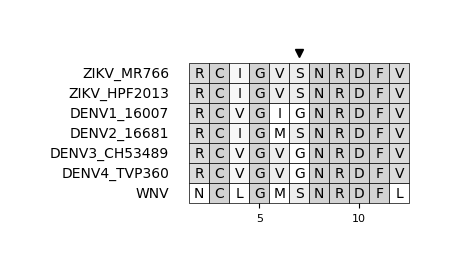

<Figure size 640x480 with 0 Axes>

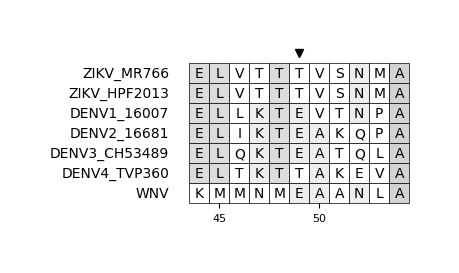

<Figure size 640x480 with 0 Axes>

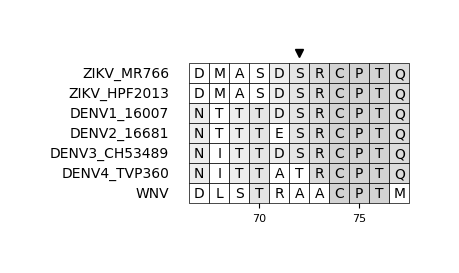

<Figure size 640x480 with 0 Axes>

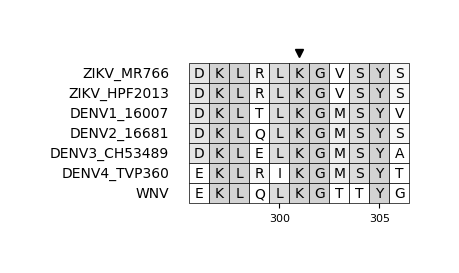

In [3]:
# Iterate through sites and make plots
for si in sites:
    # Reset plot
    plt.figure()
    
    # Define start and end
    start = si - 5
    end = si + 5
    
    # Define outfile
    si_string = str(si)
    outfile = os.path.join(resultsdir, f'site{si_string}_alignment.pdf')
    
    # Produce alignment
    mv = MsaViz(alignmentfile, 
                start = start, 
                end=end,
                color_scheme = 'Identity',
                show_grid=True,
                show_count=False)

    # add marker for mutation
    mv.add_markers([si])

    # other customization
    mv.set_plot_params(ticks_interval=5, x_unit_size=0.20, grid_color="black", identity_color="lightgrey")


    
    fig = mv.plotfig()
    fig.savefig(outfile, dpi='figure')

In [4]:
# Now calculate percent identity
# Get MSA from fasta
align = AlignIO.read(alignmentfile, "fasta")

# Initialize counters for sequence matches in H/PF/2013 and in dengue
h_match = 0
d_match = 0

# Iterate through 504 positions of reference (MR766) and compare to H/PF/2013 and dengue
for pos in range(0,(len(align[0].seq))):
    reference = align[0].seq[pos]
    h_compare = align[1].seq[pos]
    d_compare = align[3].seq[pos]
    
    # Count matches with H/PF/2013
    if h_compare == reference:
        h_match += 1
    
    # Count matches with dengue
    if d_compare == reference:
        d_match += 1

    
print('the percent identity between H/PF/2013 and MR766 is...', (h_match / len(align[0].seq)) * 100, '%')    
print('the percent identity between dengue 16681 and Zika MR766 is...', (d_match / len(align[0].seq)) * 100, '%')    

the percent identity between H/PF/2013 and MR766 is... 96.42857142857143 %
the percent identity between dengue 16681 and Zika MR766 is... 54.166666666666664 %


<Figure size 640x480 with 0 Axes>

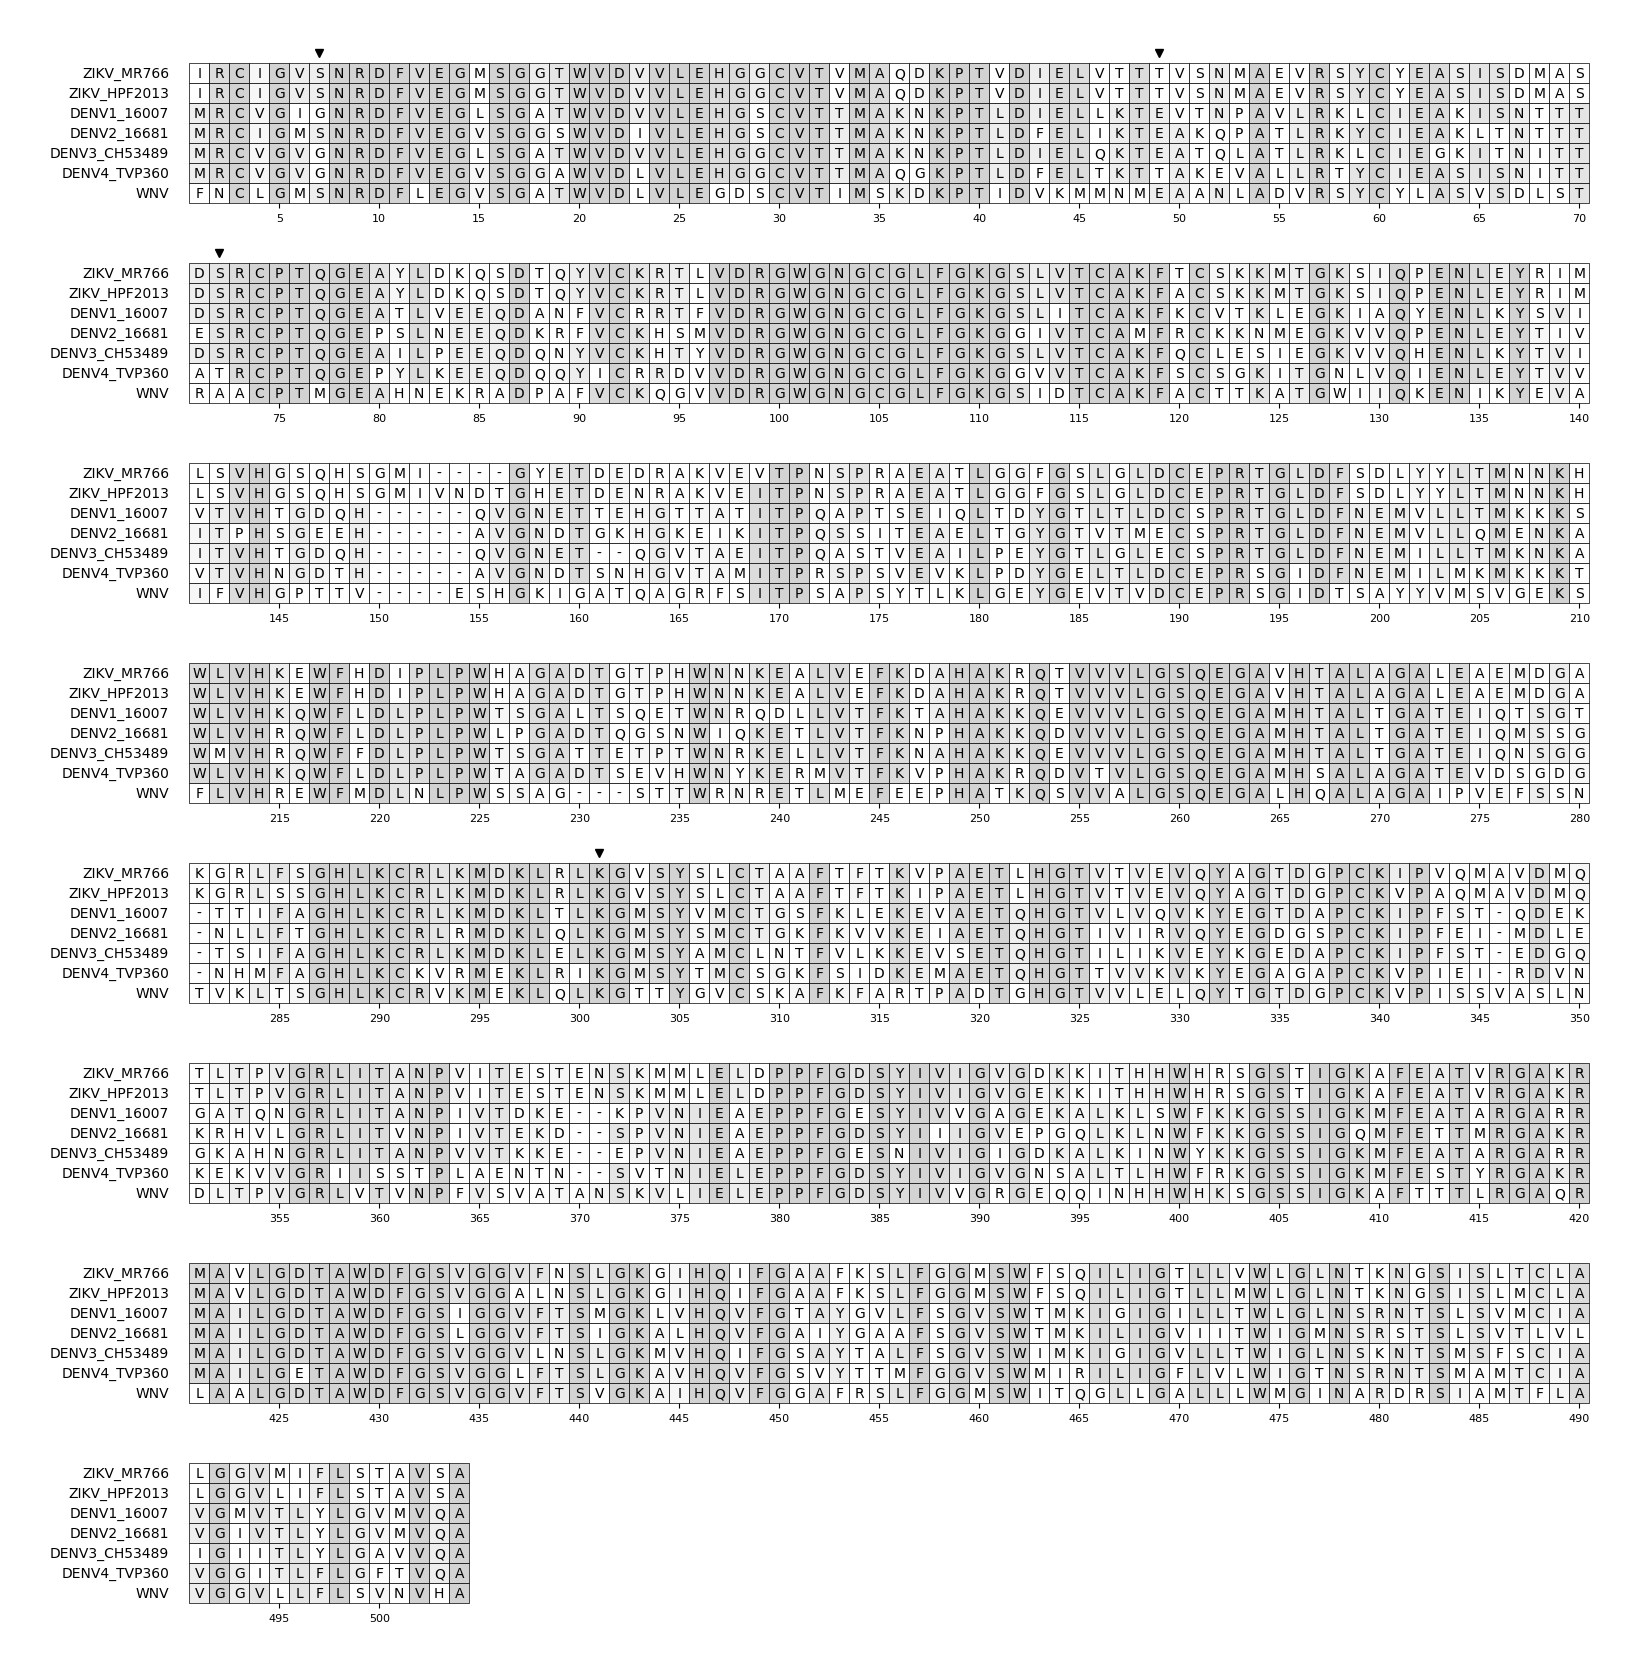

In [5]:
# We also want a full-length alignment for the supplement

# Reset plot
plt.figure()

# Define start and end
start = 1
end = len(align[0].seq)

# Define outfile
outfile = os.path.join(resultsdir, 'full_length_alignment.png')

# Produce alignment
mv = MsaViz(alignmentfile, 
            start = start, 
            end=end,
            wrap_length=70,
            color_scheme = 'Identity',
            show_grid=True,
            show_count=False)

# add marker for mutation
mv.add_markers(sites)

# other customization
mv.set_plot_params(ticks_interval=5, x_unit_size=0.20, grid_color="black", identity_color="lightgrey")

# Save figure
fig = mv.plotfig()
fig.savefig(outfile, dpi='figure')